# Image Filtering

The main objectives of this module are:

* Implement point filtering with look-up tables.
* Implement region filtering with kernel convolution, morphological operations and edge detection.
* Understand spatial frequency information with the Fourier transform.

## 1. Look-up tables

Look-up tables are a very useful tool to perform simple pixel-level filtering of an image.

Numpy arrays indexing ([see reference here](http://docs.scipy.org/doc/numpy/user/basics.indexing.html)) is a very powerful tool, but can be a bit counter-intuitive at first. We will use it to quickly create and use look-up tables to transform an image.

Look at the short example below. 

We construct an image with 4 possible values for each pixel (-> $I(x,y) \in \{0,1,2,3\}$). We then build the following LUT:

|Input value|Output value|
|--|--|
|0|2|
|1|3|
|2|1|
|3|0|

And we apply it on the image.

0 -> 2
1 -> 3
2 -> 1
3 -> 0


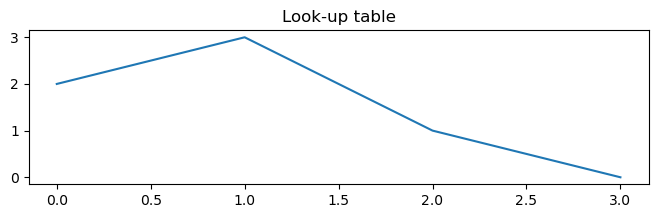

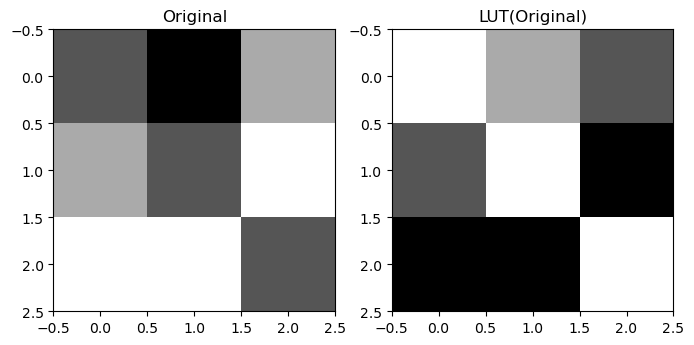

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


def show_image(image, my_cmap = cm.gray):
    #cm.jet for color
    plt.imshow(image,interpolation='nearest',cmap=my_cmap,vmin=image.min()+1, vmax=image.max()-1)
    plt.colorbar()
    plt.show()
    
def show_cumulated_histogram(image, is_plot=False):
    # Normalized histogram
    histogram=[(image==v).sum() for v in range(256)]
    h = np.array(histogram)
    norm_h = h/h.sum() #h.sum() compute the sum of all array's values. It allows to normalize
    if is_plot:
        plt.figure()
        plt.bar(range(256),norm_h)
        plt.show()
    
    # Cumulated histogram
    h_cumul = np.zeros(256)
    for i in range(256):
        h_cumul[i] = norm_h[i]+h_cumul[i-1] #When i=0, h_cumul[0] = norm_h[0]+h_cumul[-1] where h_cumul[-1]=0
                                                #because of the way we def. h_cumul
    
    plt.figure()
    plt.plot(range(256),h_cumul)
    plt.show()
    
    return h_cumul

    
# Let's create a 3x3 "image" with 4 possible pixel values (in [0,3])
im = np.array([[1,0,2],
               [2,1,3],
               [3,3,1]])


# look-up table is a vector of size 4 mapping the new value for the pixels of m
# maps:
#0 -> 2; 
#1 -> 3;
#2 -> 1; 
#3 -> 0;
lut = np.array([2,3,1,0])
for index,value in enumerate(lut):
    print("%d -> %d"%(index,value))

plt.figure(figsize=(8,2))
plt.plot(lut)
plt.title('Look-up table')
plt.show()

# we can use numpy vector indexing to apply the look-up table:
new_im = lut[im] # This will create a new array with the same size as m

plt.figure(figsize=(8,4))

plt.subplot(1,2,1) #supblot is useful to display images side-by-side
plt.imshow(im, cmap=cm.gray)
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(new_im, cmap=cm.gray)
plt.title('LUT(Original)')
plt.show()



**Starting from this example, create the following LUTs** and apply them to the "walking.jpg" image:
1. For inverting an image (so that $0 \rightarrow 255$, $255 \rightarrow 0$)
1. To keep only graylevel such that $g \ge t$, setting all other values to 0.
1. To reduce the number of gray levels from 256 to 8 (so that $255 \rightarrow 7$, $0 \rightarrow 0$).
1. To "stretch" the histogram so that, given a **minimum value** $T_{min}$ and a **maximum value** $T_{max}$, we have :
    * If $I(x,y) < T_{min}$, the new value is set to 0
    * If $I(x,y) > T_{max}$, the new value is set to 255
    * Values between $T_{min}$ and $T_{max}$ are stretched to cover the entire histogram.
1. to perform an **equalization** of the cameraman image (so that the histogram becomes "as flat as possible")

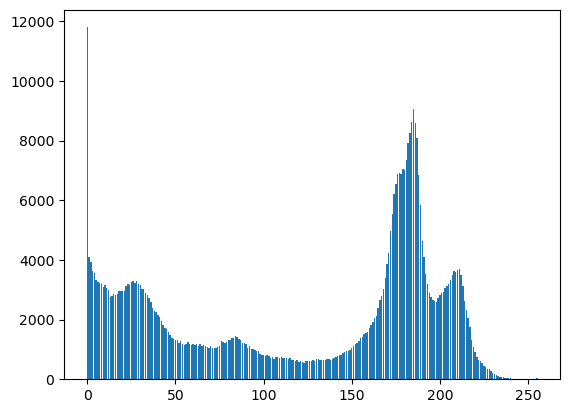

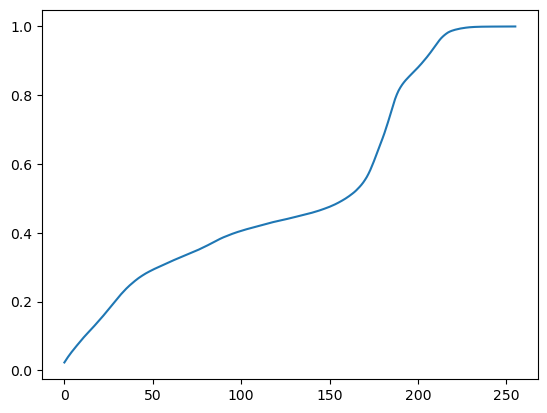

2nd percentiale : 12 
90th percentile 204
__________________auto_level has been called__________________




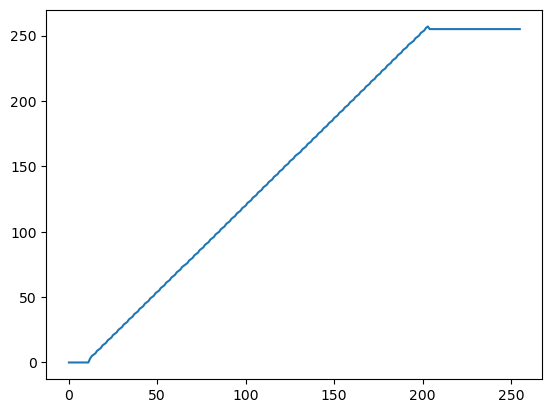

In [38]:
from skimage.io import imread,imshow,imsave
import numpy as np


im = imread('walking.jpg')

## -- Your code here -- ##

def look_up_table(is_shown = True):
    LUT = np.array([255-i for i in range(256)]) 
    plt.figure()
    plt.title('LUT that reverse colors')
    plt.plot(LUT)

    im_out = np.zeros(im.shape)
    for y in range(im.shape[0]):
        for x in range(im.shape[1]):
            im_out[y,x] = LUT[im[y,x]]
    plt.figure()
    plt.title('First way to LUT')
    show_image(im_out) if is_shown else None #HELL YEAAAAH!

    #DO THE SAME THAT LOOPING but more efficiant
    im_out_bis = LUT[im]
    plt.figure()
    plt.title('Second way to LUT')
    show_image(im_out_bis) if is_shown else None #HELL YEAAAAH!

    #How to undo LUT
    undo_LUT = LUT[LUT[im]]
    plt.figure()
    plt.title('Undo the LUT')
    show_image(undo_LUT) if is_shown else None #HELL YEAAAAH!


    other_LUT = np.array([((255-i)//50)*50 for i in range(256)])
    plt.figure()
    plt.title('LUT reverse and merge colors')
    plt.plot(other_LUT) if is_shown else None #HELL YEAAAAH!

    other_im_out = other_LUT[im]
    plt.figure()
    plt.title('LUT-ed image')
    show_image(other_im_out) if is_shown else None #HELL YEAAAAH!

    undo_other_im_out = other_LUT[other_LUT[im]]
    plt.figure()
    plt.title('Undo : LUT image')
    show_image(undo_other_im_out) if is_shown else None #HELL YEAAAAH!

#look_up_table()

def setup_auto_level():
    #Let's show the histogram to verify if we couldn't get more contraste between the highest/lowest pixel
    histogram=[(im==v).sum() for v in range(256)] #More efficient and compact
    plt.figure()
    plt.bar(range(256),histogram) #We notice there that we can delete pixel above 225 without losing too much information
                                        #To do so, we can delete all pixels above 225 and then extend the other pixels. Like that we still work between [0,255]
    cumul_histo = show_cumulated_histogram(im)
    return cumul_histo
def show_result():
     #Let's apply the new_LUT
    plt.figure()
    plt.title('Original')
    show_image(im)
    
    im_out_bis = new_LUT[im]
    plt.figure()
    plt.title('new_LUT application : more constrast')
    show_image(im_out_bis)
    
def auto_level(is_to_show=False):
    
    cumul_histo = setup_auto_level()
    
    #This is the part where we get the "Auto-level"
    for v in range(256):
        if cumul_histo[v] > 0.1: break
    Tmin = v
    for v in range(256):
        if cumul_histo[255-v] < 0.90: break
    Tmax = (255-v)+1
    
    print("2nd percentiale : %d \n90th percentile %d"%(Tmin,Tmax))
    new_LUT = np.array([i for i in range(256)]) #We can add np.array(...).astype('float') so the new_LUT become an array[float] which means we'll got to much less approximations
                                                                    #But the problem will appear at the show_image level that works with int [0:255]
    new_LUT[:Tmin] = 0
    new_LUT[Tmax:] = 255
    new_LUT[Tmin:Tmax] = 255/(Tmax-Tmin)*new_LUT[Tmin:Tmax]-Tmin
    plt.figure()
    plt.plot(new_LUT)
    if is_to_show:
        show_result()
   
    
    print("__________________auto_level has been called__________________\n\n")
    return new_LUT

new_LUT = auto_level()

#Equalization goal is to get the histogram as flat as possible to create more contrast




**Need more help? You can check the following videos:**

* [Look-Up Tables](https://www.youtube.com/watch?v=PHiiKoSsVac&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=13)
* [Auto-levels](https://www.youtube.com/watch?v=DLN4jfBJakQ&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=14)
* [Equalization](https://www.youtube.com/watch?v=C44WuMUudik&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=15)

## 2. Kernel convolution

Kernal convolution allows us to filter an image based on the values of a neighborhood.

Write a program that applies a 3x3 kernel convolution on an image. Use it on the "walking" image to perform a mean filter.

(799, 640)


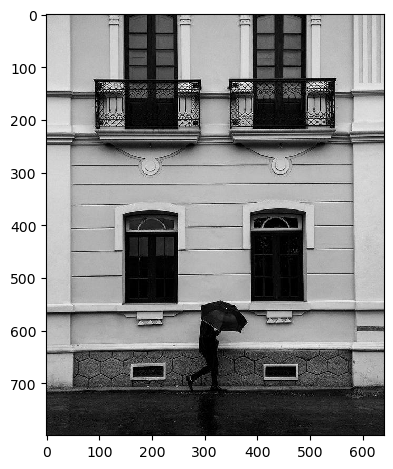

189
Kernel :
 [[ 1.  0. -1.]
 [ 1.  0. -1.]
 [ 1.  0. -1.]] 

Kernel transpo:
 [[ 1.  1.  1.]
 [ 0.  0.  0.]
 [-1. -1. -1.]] 

Region :
 [[ 30 189 184]
 [ 28 189 184]
 [ 26 188 184]]
Output value : -468.0


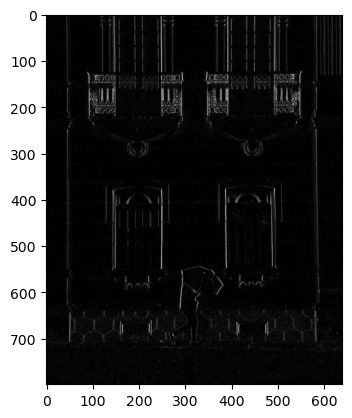

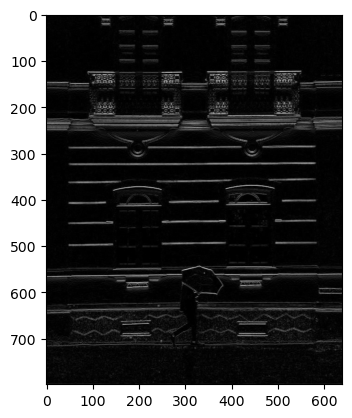

(799, 640) (799, 640)


In [8]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread,imshow,imsave

im = imread('walking.jpg')
print(im.shape)

plt.figure()
imshow(im)
plt.show()

y = 99
x = 249

old_value = im[y,x]
print(old_value)

ksize = 3
kernel = np.array([[1,0,-1],[1,0,-1],[1,0,-1]]).astype('float')
print("Kernel :\n",kernel,"\n")
kernel_T = kernel.T #.T is the "transposé"
print("Kernel transpo:\n",kernel_T,"\n")


# Get the working region (avoid edges) : We won't apply kernel to the edge's pixels
region = im[y-ksize//2:y+ksize//2+1,x-ksize//2:x+ksize//2+1]
print("Region :\n",region)

# Output value
output_value = 0
for i in range(ksize):
    for j in range(ksize):
        output_value += region[i,j]*kernel[i,j]
print("Output value :",output_value)

def kernel_apply_NOT_efficient():
    # Let's apply kernel for every pixel. To do so, we create an image (full 0)
    im_out = np.zeros((im.shape))
    for y in range(ksize//2, im.shape[0]-ksize//2):
        for x in range(ksize//2, im.shape[1]-ksize//2):
            region = im[y-ksize//2:y+ksize//2+1,x-ksize//2:x+ksize//2+1]
            for i in range(ksize):
                for j in range(ksize):
                    im_out[y,x] += region[i,j]*kernel[i,j]
    plt.figure()
    plt.imshow(np.abs(im_out), cmap=plt.cm.gray)
    plt.show()
    
def kernel_apply_efficient():
    #WAY FASTER THAN THE OTHER VERSION
    # Using numpy indexing
    im_out = np.zeros((im.shape))
    for y in range(ksize//2, im.shape[0]-ksize//2):
        for x in range(ksize//2, im.shape[1]-ksize//2):
            im_out[y,x] = (im[y-ksize//2:y+ksize//2+1,x-ksize//2:x+ksize//2+1]*kernel).sum()
    plt.figure()
    plt.imshow(np.abs(im_out), cmap=plt.cm.gray)
    plt.show()
#kernel_apply_efficient()

def kernel_apply_efficient_using_opti_lib():
    #ALWAYS FASTER
    from scipy.signal import convolve2d

    im_out = convolve2d(im, kernel, mode='same')
    im_out_T = convolve2d(im, kernel_T, mode='same')
    
    plt.figure()
    plt.imshow(np.abs(im_out), cmap=plt.cm.gray) #Here we take the absolute value abs(im) to 
    plt.show()
    
    plt.figure()
    plt.imshow(np.abs(im_out_T), cmap=plt.cm.gray)
    plt.show()
    
    print(im.shape, im_out.shape)
kernel_apply_efficient_using_opti_lib()

Using the [median filter](https://scikit-image.org/docs/stable/api/skimage.filters.rank.html#skimage.filters.rank.median) and the [mean filter](https://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean) from scikit-image, compare the behaviour of the two filters with neighborhood of increasing sizes on the "noisy" astronaut image:

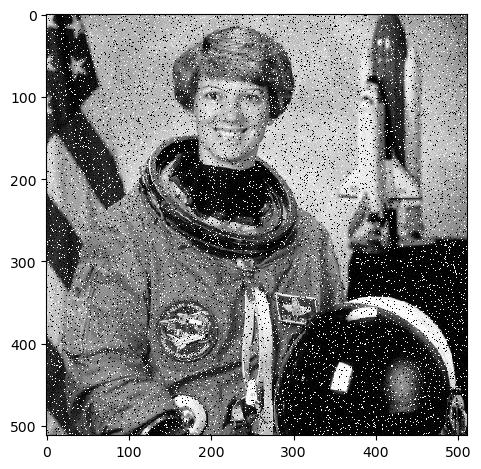

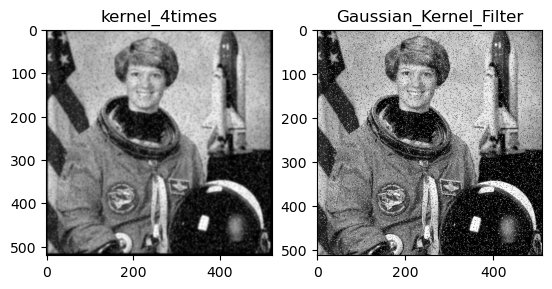

In [39]:
from skimage.filters.rank import mean, median
from skimage.filters import gaussian

import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread,imshow,imsave

im = imread('astronaut_noisy.jpg')
imshow(im)

## -- Your code here -- ##
from scipy.signal import convolve2d

# Mean kernel
def mean_kernel():
    ksize = 7
    kernel = np.ones((ksize,ksize))
    kernel /= kernel.sum()
    print("kernel :",kernel)

    im_out = convolve2d(im, kernel) #Just an efficiant way to apply/calculate convolution

    step = 1
    plt.figure()

    plt.subplot(1,2,1)
    plt.title("Original")
    plt.imshow(im[::step,::step])

    plt.subplot(1,2,2)
    plt.title("mean_kernel")
    plt.imshow(im_out[::step,::step])

    plt.show()
#mean_kernel()

#Gaussian Kernel Filter
def gaussian_kernel(size):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    g = np.exp(-(x**2/float(size)+y**2/float(size)))
    return g / g.sum()

def Gaussian_Kernel_Filter(ksize):
    #The idea is to get a kernel filter that give more height to the center less to others
    kernel = gaussian_kernel(ksize)
    kernel_4times = gaussian_kernel(4*ksize)
    #print("kernel :\n",kernel)
    im_out3 = convolve2d(im, kernel)
    im_out4 = convolve2d(im, kernel_4times)
    step = 1
    plt.figure()

    plt.subplot(1,2,1)
    plt.title("kernel_4times")
    plt.imshow(im_out4,cmap = plt.cm.gray)

    plt.subplot(1,2,2)
    plt.title("Gaussian_Kernel_Filter")
    plt.imshow(im,cmap = plt.cm.gray)

    return im_out3
im_out3 = Gaussian_Kernel_Filter(2)

def Gaussian_Kernel_Filter_efficiant(ksize):
    im_out3 = gaussian(im, ksize)
    step = 1
    
    plt.figure()
    
    plt.subplot(1,2,1)
    plt.title("Original")
    plt.imshow(im[::step,::step])
    
    plt.subplot(1,2,2)
    plt.title("Gaussian_Kernel_Filter_efficiant")
    plt.imshow(im_out3[::step,::step])
    
    
#Gaussian_Kernel_Filter_efficiant(3)

**Need more help? You can check the following videos:**

* [Kernel convolution](https://www.youtube.com/watch?v=FaTvGWPnLng&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=16)
* [Mean and Median filters](https://www.youtube.com/watch?v=GLTuF3lwDLs&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=17)

## 3. 2D Fourier transform

The 2D Fourier transform allows us to get a representation of the spatial frequencies present in an image. A very powerful way of filtering images is to modify those frequencies directly by modifying the "Fourier image", and to use the inverse transform to get the pixel values of the filtered image.

Let's illustrate that with a fake example. We start with a completely random signal and compute the Fourier transform. Note that the Fourier image is complex, so we use its amplitude. As the range of amplitudes is so high that we don't see much in the resulting image, we display the log of the amplitude.

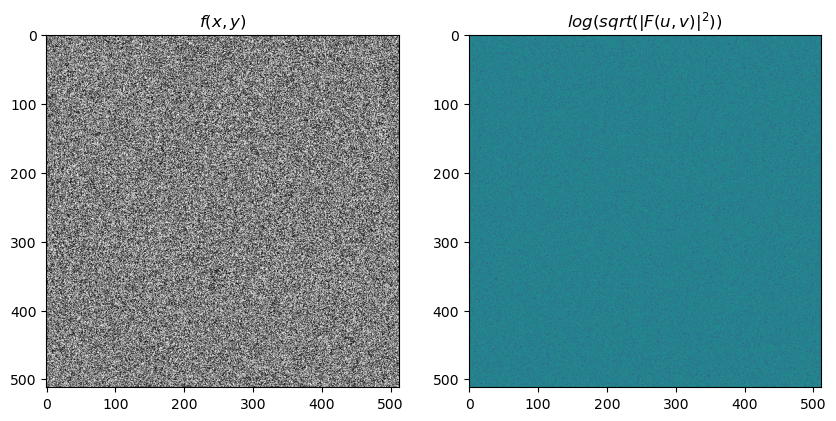

In [6]:
from numpy.fft import fft2,ifft2,fftshift,ifftshift
# fft2 -> Fourier transform
# ifft2 -> Inverse transform
# fftshift & ifftshift -> reorganize the "Fourier image" to make it more easily interpretable.

im = np.random.random((512,512))
f = fftshift(fft2(im)) #Just make sure that lower frequencies are corrects
amplitude = np.sqrt(np.real(f)**2+np.imag(f)**2)

plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.imshow(im,cmap = plt.cm.gray)
plt.title('$f(x,y)$')
plt.subplot(1,2,2)
plt.imshow(np.log(amplitude))# show log so as to see more than just the global maximum
plt.title('$log(sqrt(|F(u,v)|^2))$')
plt.show()

We could now, for instance, decide to add an horizontal frequency by creating peaks in the Fourier image on the horizontal axis. The further away from the center we put the peaks, the higher the frequency.

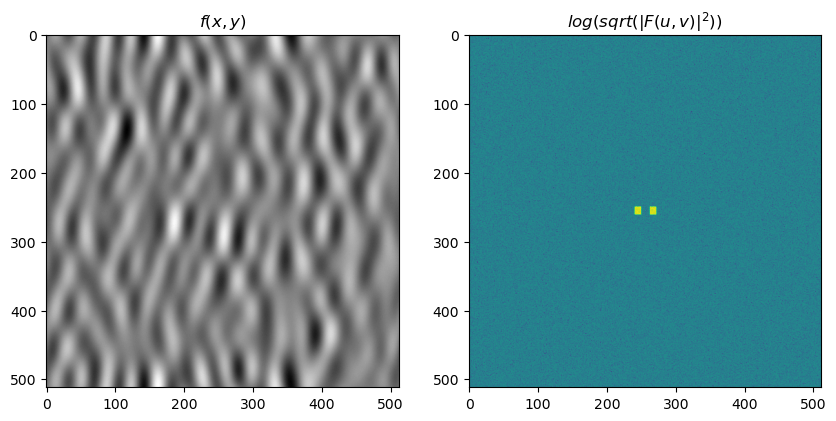

In [5]:
f2 = f.copy()
f2[250:262,262:272] *= 1000
f2[250:262,240:250] *= 1000
amplitude = np.sqrt(np.real(f2)**2+np.imag(f2)**2)
im2 = ifft2(ifftshift(f2)).real

plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.imshow(im2,cmap = plt.cm.gray)
plt.title('$f(x,y)$')
plt.subplot(1,2,2)
plt.imshow(np.log(amplitude))# show log so as to see more than just the global maximum
plt.title('$log(sqrt(|F(u,v)|^2))$')
plt.show()

Now we could also decide to mask the central region, which would remove the peaks that we just created and put all those values at zero. The image will once again look random:

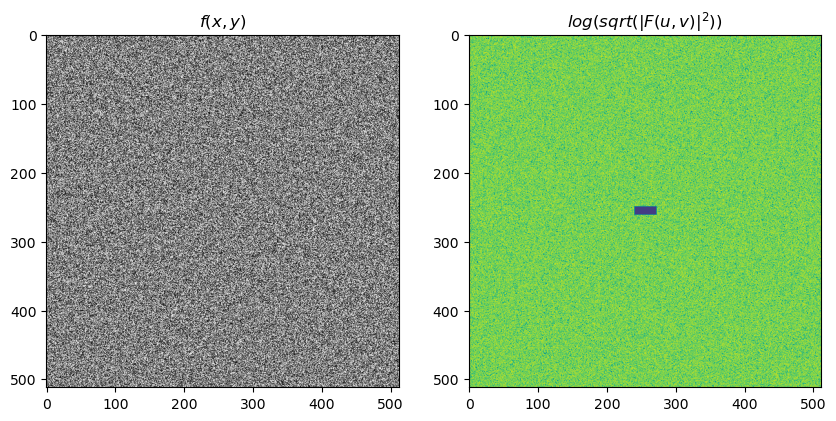

In [7]:
f3 = f2.copy()
f3[250:262,240:272] = 0
amplitude = np.sqrt(np.real(f3)**2+np.imag(f3)**2)
im3 = ifft2(ifftshift(f3)).real

plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.imshow(im3,cmap = plt.cm.gray)
plt.title('$f(x,y)$')
plt.subplot(1,2,2)
plt.imshow(np.log(amplitude, where=amplitude>0))
plt.title('$log(sqrt(|F(u,v)|^2))$')
plt.show()

Starting from those examples and the code below:

1. Use the Fourier transform to reduce the [dithering](https://en.wikipedia.org/wiki/Dither) of the *moire.png* image by building a low-pass filter.
1. Build a high-pass filter using Fourier transform and apply the filter to the "walking" image.

In [18]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread,imshow,imsave

im = imread('camera.jpg').astype(float)
f = fftshift(fft2(im)) # shift Fourier image so that the center corresponds to low frequencies

amplitude = np.sqrt(np.real(f)**2+np.imag(f)**2)

plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.imshow(im,cmap = plt.cm.gray)
plt.title('$f(x,y)$')
plt.subplot(1,2,2)
plt.imshow(np.log(amplitude))# show log so as to see more than just the global maximum
plt.title('$log(|F(u,v)|^2)$')
plt.show()

<IPython.core.display.Javascript object>

In [16]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread,imshow,imsave
from numpy.fft import fft,ifft,fft2,ifft2,fftshift,ifftshift

def fourier2(im):
    return fftshift(fft2(im))

def ifourier2(f):
    return ifft2(ifftshift(f)).real

def fourier(s):
    return fftshift(fft(s))

def ifourier(f):
    return ifft(ifftshift(f)).real

def ampl(f):
    return np.sqrt(f.real**2 + f.imag**2)

def phase(f):
    return np.arctan2(f.imag, f.real)
t = np.arange(1000)
s = np.sin(t)
f = fourier(s)

plt.figure()
plt.subplot(2,1,1)
plt.plot(ampl(f))
plt.subplot(2,1,2)
plt.plot(s)
plt.show()

<IPython.core.display.Javascript object>

In [ ]:

## -- Your code here -- ##


**Need more help? You can check the following videos:**

* [Understanding the 2D Fourier transform](https://www.youtube.com/watch?v=bsNQpeBZ7IY&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=18)
* [Filters in Fourier space](https://www.youtube.com/watch?v=8g-sE7wkKpU&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=19)

## 4. Morphological operations

* For morphology functions, [see the skimage documentation](http://scikit-image.org/docs/dev/api/skimage.morphology.html?highlight=morphology#module-skimage.morphology)

Starting from the example below:

1. Using the "opening" operation with a disk structuring element of increasing size, determine how many circles of any given radius there are in the *circles.png* image.
1. Build a morphological filter that eliminates one size of circles.

Text(0.5, 1.0, 'dilation')

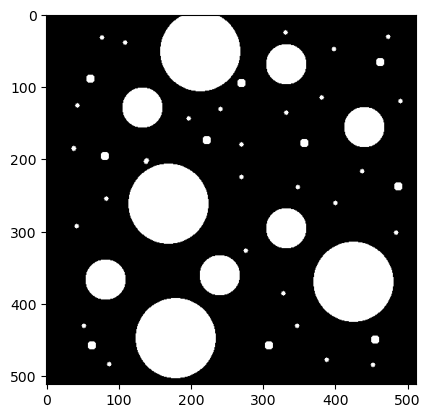

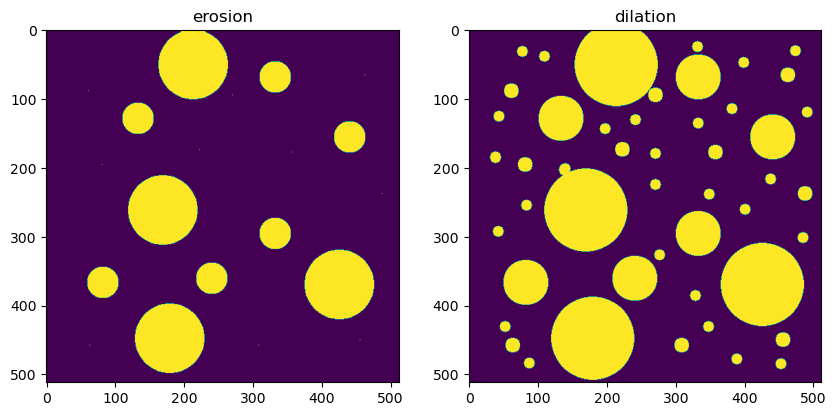

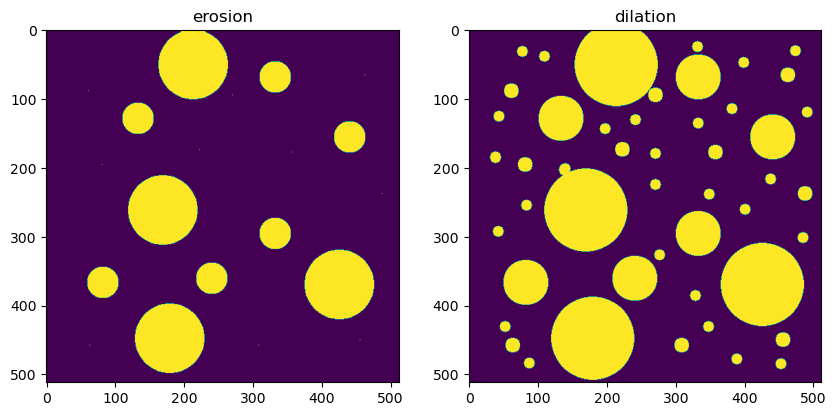

In [52]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.io import imread
from skimage.morphology import disk, erosion, dilation

im = imread('circles1.png')==0 #to be sure objects are = 1
plt.imshow(im,cmap=plt.cm.gray);

# use the local maximum and local minimum for dilation and erosion
eroded_image = erosion(im,disk(5))
dilated_image = dilation(im,disk(5))

plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
plt.imshow(eroded_image)
plt.title('erosion')
plt.subplot(1,2,2)
plt.imshow(dilated_image)
plt.title('dilation')

# note that "erosion" and "dilation" are the same as the "local minimum" and "local maximum" :
from skimage.filters.rank import minimum,maximum
eroded_image = minimum(im.astype('uint8'), disk(5))
dilated_image = maximum(im.astype('uint8'), disk(5))

plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
plt.imshow(eroded_image)
plt.title('erosion')
plt.subplot(1,2,2)
plt.imshow(dilated_image)
plt.title('dilation')

**Need more help? You can check the following videos:**

* [Morphological operations](https://www.youtube.com/watch?v=b64M2dZaWPA&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=20)

## 5. Edge detection

Using the [convolve2d](http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.signal.convolve2d.html) function, develop the Sobel filter. 
The Sobel operator is given by
$$\mathbf{G} = \sqrt{ {\mathbf{G}_x}^2 + {\mathbf{G}_y}^2 }$$
where $G_x$ and $G_y$ are images respectively obtained by a convolution with the given kernels
$$\mathbf{g}_y = \begin{bmatrix} 
    -1 & -2 & -1  \\
    0 & 0 & 0 \\
    +1 & +2 & +1 
    \end{bmatrix}
    \quad
    \mbox{and}
    \quad   
    \mathbf{g}_x = \begin{bmatrix} 
    -1 & 0 & +1 \\
    -2 & 0 & +2 \\
    -1 & 0 & +1 
    \end{bmatrix}
    $$

**Apply the Sobel filter** to find the edges in the "road" image.

Compare with the results of the **Canny edge filter** with different "sigma" values (see [the skimage documentation](http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html))

gy :
 [[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]
gx :
 [[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]


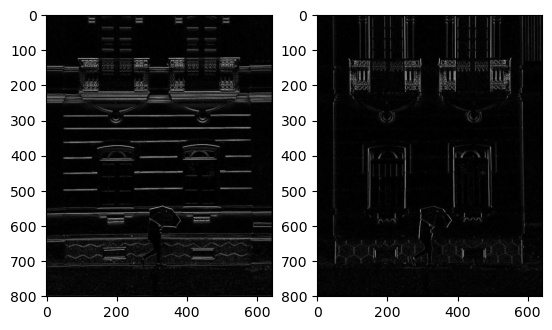

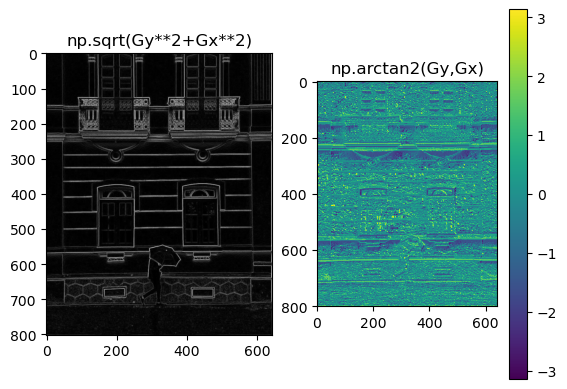

array([[265.87214973, 591.97972938, 750.00266666, ..., 797.00062735,
        626.78385429, 275.77164466],
       [595.77344687, 794.79934575, 752.01063822, ..., 784.02295885,
        838.83013775, 610.32778079],
       [755.00066225, 747.00602407,   1.41421356, ...,  18.38477631,
        803.10522349, 765.01633969],
       ...,
       [135.09256086, 141.59802259,  21.26029163, ...,  27.20294102,
         98.23441352,  91.44397192],
       [111.97321108, 148.60013459, 141.28694207, ...,  92.77930804,
         93.34880824,  63.90618123],
       [ 52.32590181, 117.00427343, 150.01333274, ...,  85.14693183,
         62.62587325,  26.87005769]])

In [48]:
from skimage.data import camera
from skimage.io import imread
from scipy.signal import convolve2d
from skimage.filters import gaussian

gy = np.array([[-1.,-2.,-1.],[0.,0.,0.],[1.,2.,1.]])
gx = gy.T # transpose operator

print("gy :\n",gy)
print("gx :\n",gx)
im = imread('walking.jpg', as_gray=True)
Gy = convolve2d(im, gy)
Gx = convolve2d(im, gx)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(np.abs(Gy),cmap=plt.cm.gray)
plt.subplot(1,2,2)
plt.imshow(np.abs(Gx),cmap=plt.cm.gray)
plt.show()
def sobel_apply(im):
    gy = np.array([[-1.,-2.,-1.],[0.,0.,0.],[1.,2.,1.]])
    gx = gy.T # transpose operator
    
    Gy = convolve2d(im, gy)
    Gx = convolve2d(im, gx)
    s = np.sqrt(Gy**2+Gx**2) #Allows us to free ourself from the orientation
    d = np.arctan2(Gy,Gx)

    plt.figure()
    plt.subplot(1,2,1)
    plt.title("np.sqrt(Gy**2+Gx**2)")
    plt.imshow(s,cmap=plt.cm.gray)

    plt.subplot(1,2,2)
    plt.title("np.arctan2(Gy,Gx)")
    plt.imshow(d, cmap=plt.cm.viridis)
    plt.colorbar()
    plt.show()
    
    return s

sobel_apply(im)

Use the **[Hough transform](http://scikit-image.org/docs/dev/auto_examples/edges/plot_line_hough_transform.html)** to find the main straight lines in the road image, using the results from the Canny edge detector.

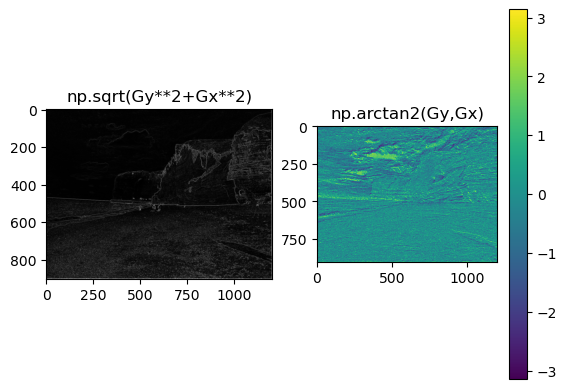

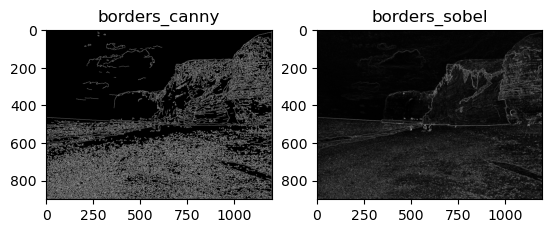

In [58]:
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.feature import canny



im = rgb2gray(imread('etretat.jpg'))
#im = imread('etretat.jpg')

#br = sobel(im[:,:,0])
#bg = sobel(im[:,:,1])
#bb = sobel(im[:,:,2])

borders = sobel_apply(im)
borders_sobel = sobel(im)
borders_canny = canny(im)

plt.figure()
plt.subplot(1,2,1)
plt.title("borders_canny")
plt.imshow(borders_canny,cmap=plt.cm.gray)
plt.subplot(1,2,2)
plt.title("borders_sobel")
plt.imshow(borders_sobel,cmap=plt.cm.gray)
plt.show()

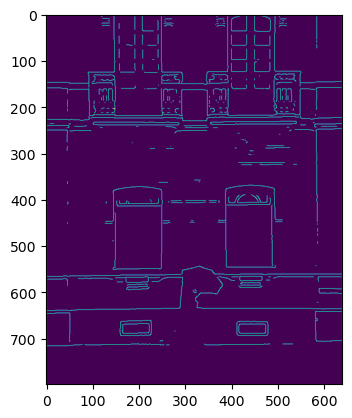

In [68]:
from skimage.feature import canny
from skimage.filters import sobel

im = imread("walking.jpg")
"""
sigma : gaussian blurring to get a smoother image
low_threshold=50 : 
high_threshold=70
"""
borders = canny(im, sigma=2., low_threshold=90, high_threshold=90)

plt.figure()
plt.imshow(borders)
plt.show()

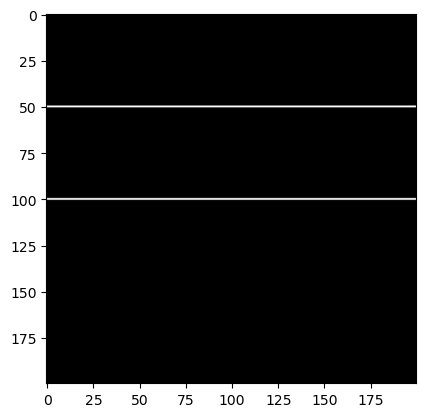

[200 200] [] []


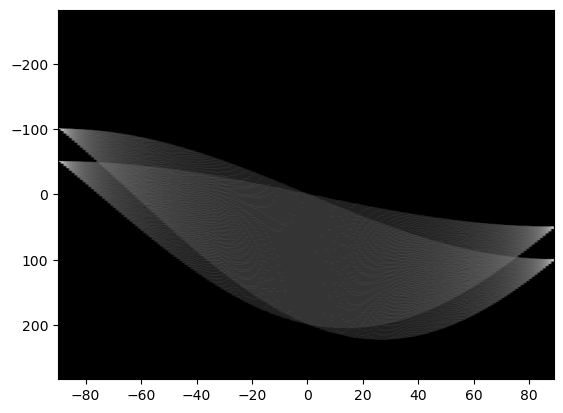

In [70]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread,imshow,imsave
from skimage.transform import hough_line,hough_line_peaks

im_fake = np.zeros((200,200))
im_fake[50,:] = 1
im_fake[100,:] = 1
plt.figure()
plt.gray()
plt.imshow(im_fake)
plt.show()

h, theta, d = hough_line(im_fake)
hpeaks, angles, dists = hough_line_peaks(h, theta, d)
print(hpeaks, np.rad2deg(angles), dists)
plt.figure()
plt.imshow(np.log(h+1), extent=[np.rad2deg(theta[0]), np.rad2deg(theta[-1]), d[-1], d[0]], aspect='auto')
plt.show()

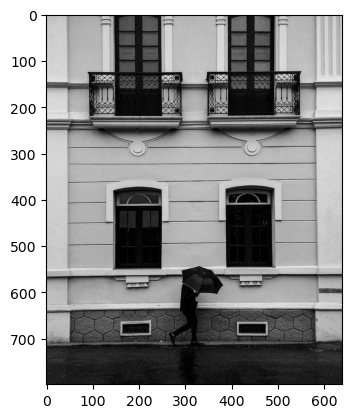

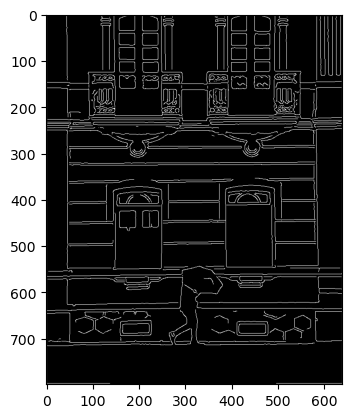

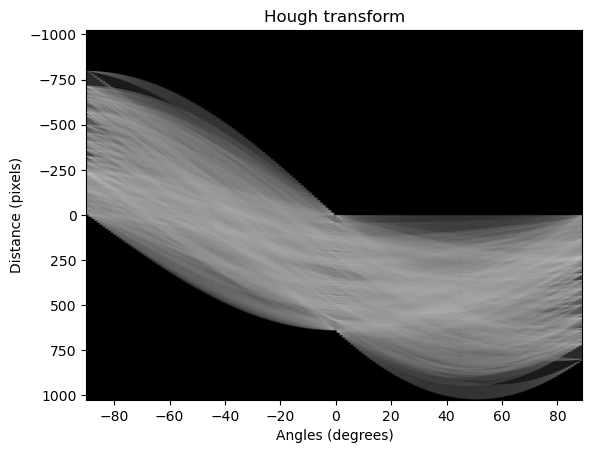

In [71]:
im = imread('walking.jpg')
plt.figure()
plt.gray()
plt.imshow(im)
plt.show()

from skimage.feature import canny

borders = canny(im, sigma=2)

plt.figure()
plt.imshow(borders)
plt.show()

h, theta, d = hough_line(borders)

plt.figure()
plt.imshow(np.log(h+1), extent=[np.rad2deg(theta[0]), np.rad2deg(theta[-1]), d[-1], d[0]], aspect='auto')
plt.title('Hough transform')
plt.xlabel('Angles (degrees)')
plt.ylabel('Distance (pixels)')
plt.show()

(3,)
(3,)
(3,)


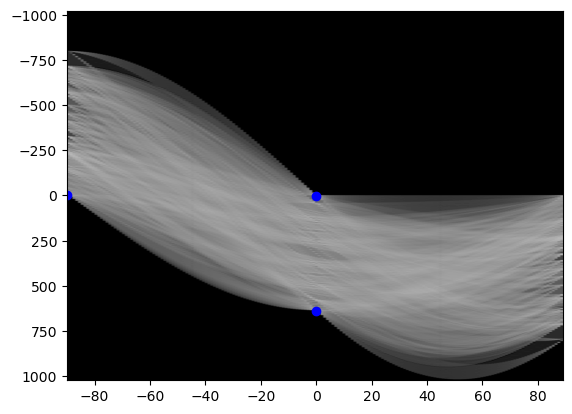

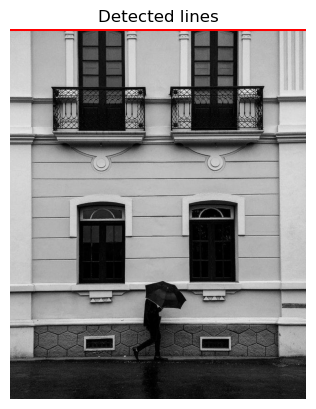

In [74]:
hpeaks, angles, dists = hough_line_peaks(h, theta, d, num_peaks=10)
print(hpeaks.shape)
print(angles.shape)
print(dists.shape)

plt.figure()
plt.imshow(np.log(h+1),aspect='auto',extent=[np.rad2deg(theta[0]), np.rad2deg(theta[-1]), d[-1], d[0]])
plt.plot(np.rad2deg(angles),dists,'bo')
plt.show()

plt.figure()
plt.imshow(im, cmap=plt.cm.gray)

for i in range(len(hpeaks)):
    sin_value = np.sin(angles[i])
    if sin_value !=0:
        x0 = 0
        x1 = im.shape[1]
        y0 = (dists[i]-x0*np.cos(angles[i]))/np.sin(angles[i])
        y1 = (dists[i]-x1*np.cos(angles[i]))/np.sin(angles[i])
        plt.plot((x0,x1), (y0,y1), '-r')
    
plt.xlim((0,im.shape[1]))
plt.ylim((im.shape[0], 0))
plt.axis('off')
plt.title('Detected lines')
plt.show()

**Need more help? You can check the following videos:**

* [Edge detection with the Sobel filter](https://www.youtube.com/watch?v=QCjh8yyW-Wo&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=21)
* [Edge detection with the Canny transform](https://www.youtube.com/watch?v=yS5NnpWmuuI&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=22)
* [Line detection with the Hough Transform](https://www.youtube.com/watch?v=GD2xipfKQyY&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=23)

# Coding project - Picture enhancement

Write code that automatically enhances a photograph.

<img src="etretat.jpg" width="250px" />
<img src="ex_enhance.jpg" width="250px" />

"Enhance" may mean a lot of different things, and we encourage you to be creative in which enhancements you want to implement.

Some possibilities include (not an exhaustive list):

* Noise reduction
* Auto-level
* Gamma correction (with gamma provided by the user or automatically determined from the image histogram)
* Increase colour saturation
* ...

In [3]:
from skimage.io import imread,imsave,imshow
from skimage.color import rgb2hsv
from matplotlib.pyplot import cm

import matplotlib.pyplot as plt
import numpy as np


# Noice reduction : median filter
from skimage.filters.rank import mean, median
from skimage.morphology import disk

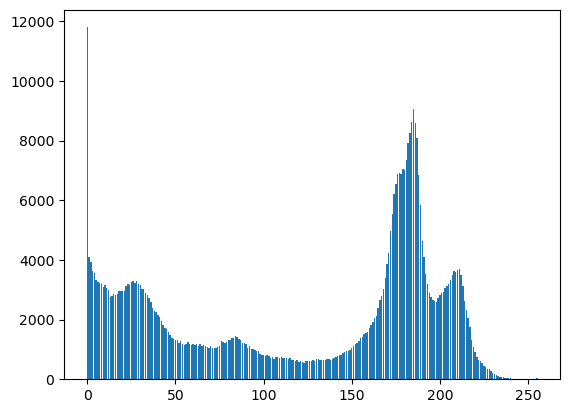

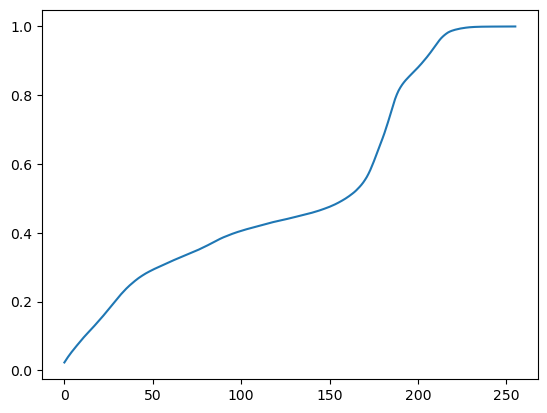

2nd percentiale : 12 
90th percentile 204


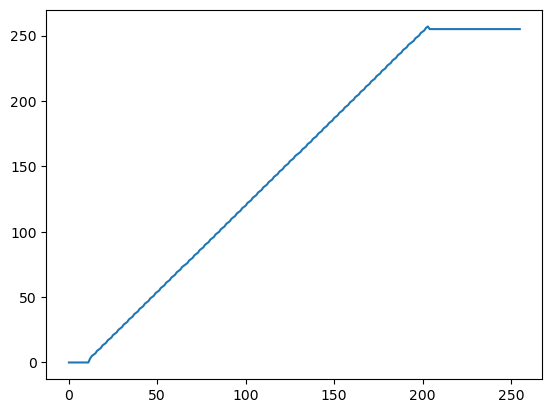

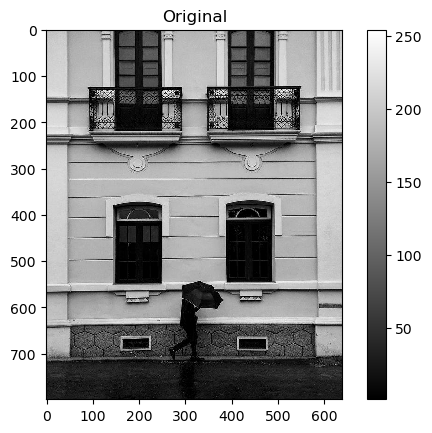

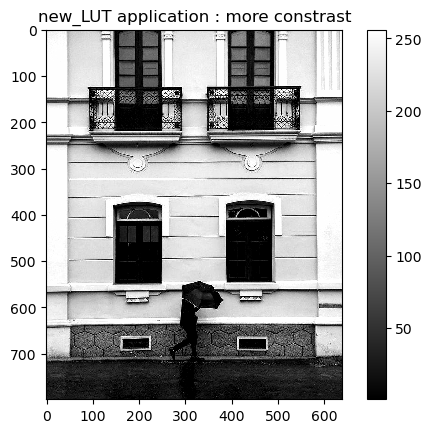

__________________auto_level has been called__________________




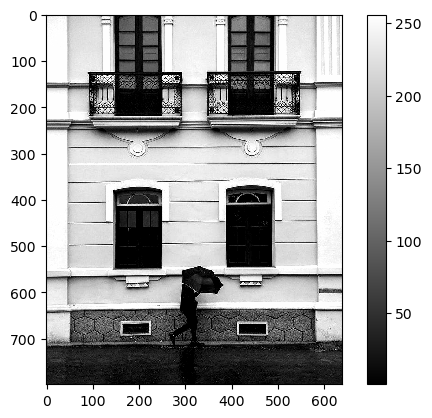

In [21]:
def reduce_noise(im) :
    im_r = im[:,:,0]
    im_g = im[:,:,1]
    im_b = im[:,:,2]
    d = disk(1)
    im_median_r = median(im_r, d)
    im_median_g = median(im_g, d)
    im_median_b = median(im_b, d)

    # https://stackoverflow.com/questions/10443295/combine-3-separate-numpy-arrays-to-an-rgb-image-in-python/10463090
    return np.dstack((im_median_r,im_median_g,im_median_b))

# Auto-leveling
## Look up table based on the cumulative histogram
def cumul_hist(im) :
    cumul_hist = np.zeros((256,))
    c = 0
    
    for v in range(256) :
        c += (im==v).sum()
        cumul_hist[v] = c
    cumul_hist /= cumul_hist.max()
    return cumul_hist



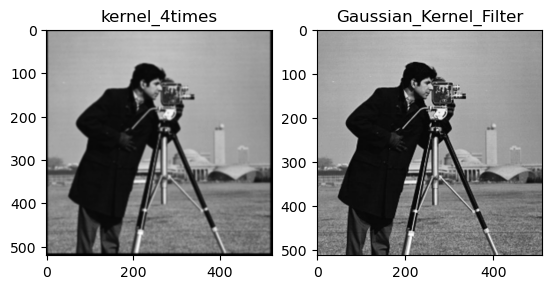

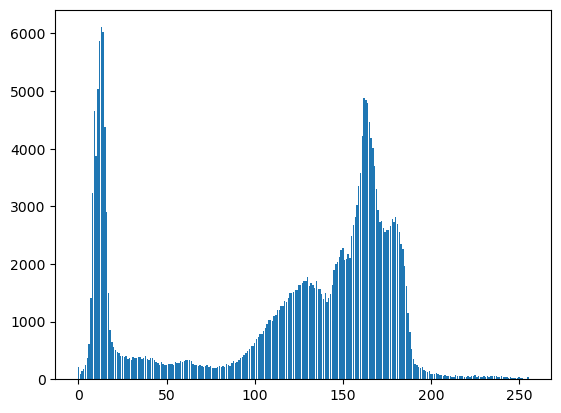

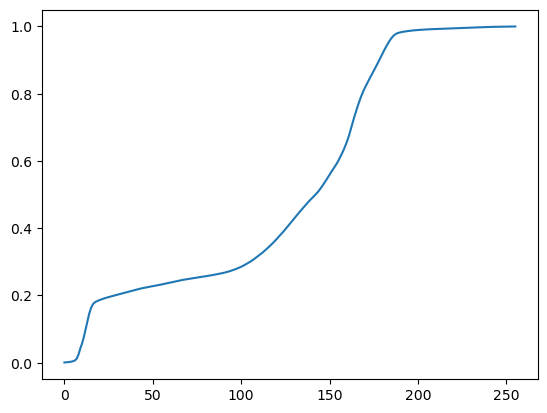

2nd percentiale : 13 
90th percentile 179
__________________auto_level has been called__________________




Text(0.5, 1.0, 'The Mean filter')

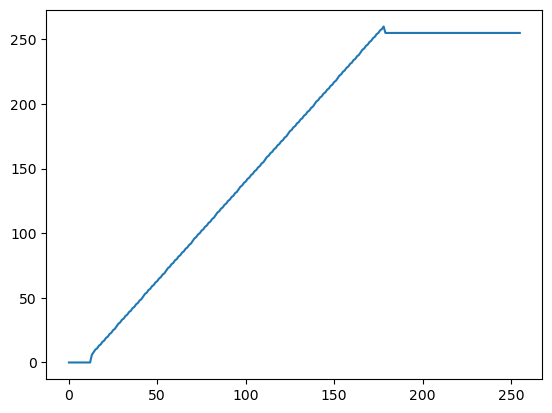

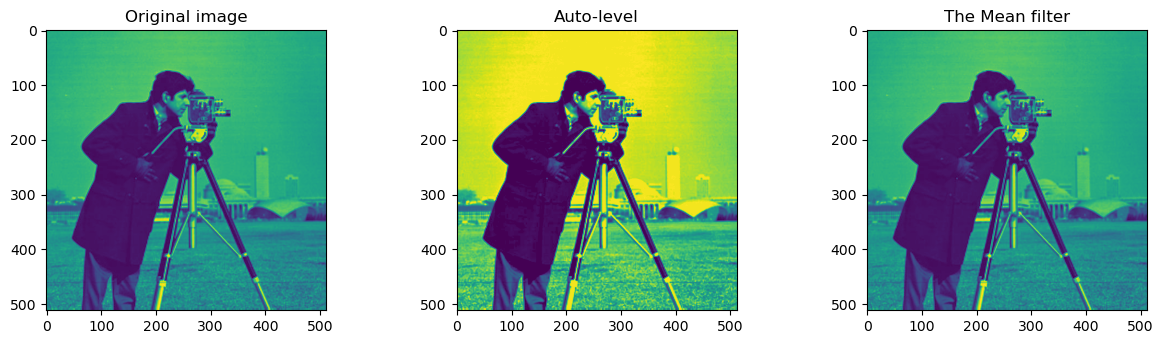

In [41]:
#im = imread('etretat_copy.jpg')
im = imread('camera.jpg')

#Noise reduction
ksize = 5
smooth_image = Gaussian_Kernel_Filter(2)

#Auto-level : Increase colour saturation
auto_level_LUT = auto_level(); auto_level_image = auto_level_LUT[im]

#Gamma correction (with gamma provided by the user or automatically determined from the image histogram)

smooth_image = im
plt.figure(figsize=[15,8])
plt.subplot(2,3,1)
plt.imshow(im)
plt.title('Original image')

plt.subplot(2,3,2)
plt.imshow(auto_level_image)
plt.title('Auto-level')

plt.subplot(2,3,3)
plt.imshow(smooth_image)
plt.title('The Mean filter')